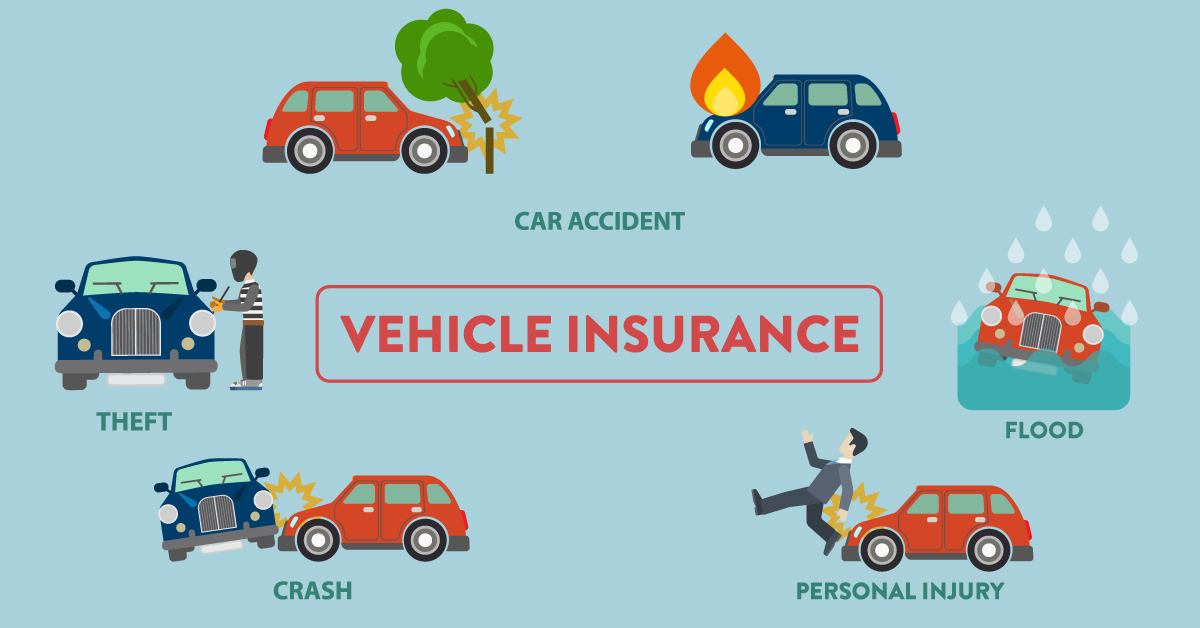

<font size="+3" color='#053c96'><b> Problem Statement</b></font>

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

<font size="+3" color='#053c96'><b>Bussiness Goal</b></font>

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

<font size="+3" color='#053c96'><b>This Notebook will cover - </b></font>
### 1. Exploratory Data Analysis
### 2. Data Modelling and Evaluation

<font size="+2" color=chocolate ><b>Please Upvote my kernel if you like my work.</b></font>

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

# Import Dataset

In [ ]:
train=pd.read_csv('../input/vehicle-data/train.csv')
test=pd.read_csv('../input/vehicle-data/test.csv')

In [ ]:
test.head()

In [ ]:
train.head()

In [ ]:
train.shape

# Check for missing values

In [ ]:
train.isnull().sum()

* No missing data

<font size="+3" color='#540b11'><b> Exploratory Data Analysis </b></font>

In [ ]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [ ]:
train[numerical_columns].describe()

In [ ]:
train

# Target Variable (Response)

In [ ]:
sns.countplot(train.Response)

In [ ]:
train.Response.value_counts()

# Age Distribution of Customers

In [ ]:
sns.distplot(train.Age)

In [ ]:
sns.boxplot(y = 'Age', data = train,palette='Accent')

# Age Vs Annual premium 

In [ ]:
sns.scatterplot(x=train['Age'],y=train['Annual_Premium'])

# Gender and Response

In [ ]:
sns.countplot(train.Gender)

In [ ]:
df=train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()


In [ ]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

# Driving license by Gender

In [ ]:
df=train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

In [ ]:
df

In [ ]:
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");

# Customers having Vehicle insurance already

In [ ]:
sns.countplot(train.Previously_Insured)

# Vehicle Age 

In [ ]:
sns.countplot(train.Vehicle_Age)

# Response and Vehicle age

In [ ]:
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

In [ ]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

# Customers having damaged vehicle

In [ ]:
sns.countplot(train.Vehicle_Damage)

# Damage Vehicle and Response

In [ ]:
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

In [ ]:
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

# Annual Premium Distribution 

In [ ]:
sns.distplot(train.Annual_Premium)

In [ ]:
sns.boxplot(y = 'Annual_Premium', data = train,palette='Accent')

# Vintage

Number of Days, Customer has been associated with the company

In [ ]:
sns.distplot(train.Vintage)

<font size="+3" color='#540b11'><b> Data Preprocessing </b> </font>

In [ ]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [ ]:
train['Gender'] = train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [ ]:
train=pd.get_dummies(train,drop_first=True)

In [ ]:
train=train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train['Vehicle_Age_lt_1_Year']=train['Vehicle_Age_lt_1_Year'].astype('int')
train['Vehicle_Age_gt_2_Years']=train['Vehicle_Age_gt_2_Years'].astype('int')
train['Vehicle_Damage_Yes']=train['Vehicle_Damage_Yes'].astype('int')

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
train[num_feat] = ss.fit_transform(train[num_feat])


mm = MinMaxScaler()
train[['Annual_Premium']] = mm.fit_transform(train[['Annual_Premium']])

In [ ]:
train=train.drop('id',axis=1)

In [ ]:
for column in cat_feat:
    train[column] = train[column].astype('str')

In [ ]:
train

In [ ]:
test['Gender'] = test['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
test=pd.get_dummies(test,drop_first=True)
test=test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
test['Vehicle_Age_lt_1_Year']=test['Vehicle_Age_lt_1_Year'].astype('int')
test['Vehicle_Age_gt_2_Years']=test['Vehicle_Age_gt_2_Years'].astype('int')
test['Vehicle_Damage_Yes']=test['Vehicle_Damage_Yes'].astype('int')

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
test[num_feat] = ss.fit_transform(test[num_feat])


mm = MinMaxScaler()
test[['Annual_Premium']] = mm.fit_transform(test[['Annual_Premium']])

In [ ]:
for column in cat_feat:
    test[column] = test[column].astype('str')

In [ ]:
from sklearn.model_selection import train_test_split

train_target=train['Response']
train=train.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [ ]:
id=test.id

In [ ]:
test=test.drop('id',axis=1)

In [ ]:
x_train.columns

<font size="+3" color='#540b11'><b> Data Modelling and Evaluation </b> </font>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

# Random Forest Classifier

In [ ]:
%pylab inline

In [ ]:
x_train.dtypes

In [ ]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

## Save model

In [ ]:
filename = 'rf_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename = 'rf_model.sav'

In [ ]:
rf_load = pickle.load(open(filename, 'rb'))

# Evaluate Model 

In [ ]:
y_pred=model.predict(x_test)

## Classification Report 

In [ ]:
print (classification_report(y_test, y_pred))

## ROC Curve & AUC of Random forest classifier

In [ ]:
y_score = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('Random Forest ROC curve: CC Fraud')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
roc_auc_score(y_test, y_score)

# CatBoost 

In [ ]:
#X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, Y_cat, test_size = 0.22, random_state = 22, stratify = Y_cat, shuffle = True)

cat_model = CatBoostClassifier()
cat_model = cat_model.fit(x_train, y_train, cat_features = cat_feat, eval_set = (x_test, y_test), early_stopping_rounds = 10, verbose = 100)

predictions = [pred[1] for pred in cat_model.predict_proba(x_test)]
print('Validation ROC AUC Score:', roc_auc_score(y_test, predictions, average = 'weighted'))

<font size="+1" color='blue'><b> I hope you enjoyed this kernel , Please don't forget to appreciate me with an Upvote.</b></font>

<img src="https://i.pinimg.com/originals/e2/d7/c7/e2d7c71b09ae9041c310cb6b2e2918da.gif">